In [11]:
import psycopg2
connection = psycopg2.connect("host=localhost port=5432 dbname=postgres user=postgres password=ckwj4187")
connection.get_backend_pid()

<cursor object at 0x00000156EE7C8900; closed: 0>
('PostgreSQL 13.1, compiled by Visual C++ build 1914, 64-bit',)
('PostgreSQL 13.1, compiled by Visual C++ build 1914, 64-bit',)


In [56]:
import pandas as pd

# postgresql上のデータをDataFrame型に変換
df = pd.read_sql(sql="SELECT * FROM Tweetdata01_5;", con=connection)

# 企業ごとにデータを分割
df_a  = df[df['company_name'] == 'apple']
df_g  = df[df['company_name'] == 'Google Inc']
df_am = df[df['company_name'] == 'Amazon.com']
df_t  = df[df['company_name'] == 'Tesla Inc']
df_m  = df[df['company_name'] == 'Microsoft']
df

,company_name,tweet_date,tweet_num,tweet_text_sum,tweet_comment_sum,tweet_comment_max,tweet_retweet_sum,tweet_retweet_max,tweet_like_sum,tweet_like_max,company_value,company_variation
0,apple,2015-01-01,72,9206,8,4,37,18,61,17,110.38,↓
1,apple,2015-01-02,254,26691,38,8,459,348,183,22,109.33,→
2,apple,2015-01-03,389,40429,41,4,110,20,156,6,109.33,→
3,apple,2015-01-04,174,20354,7,1,52,19,85,12,109.33,↓
4,apple,2015-01-05,289,32923,35,4,97,34,153,33,106.25,↑
...,...,...,...,...,...,...,...,...,...,...,...,...
2907,Tesla Inc,2015-12-26,74,8943,2,2,19,4,13,5,230.57,→
2908,Tesla Inc,2015-12-27,96,11865,1,1,26,5,36,9,230.57,↓
2909,Tesla Inc,2015-12-28,109,13553,8,2,53,24,59,31,228.95,↑
2910,Tesla Inc,2015-12-29,135,15392,19,2,46,15,95,23,237.19,↑


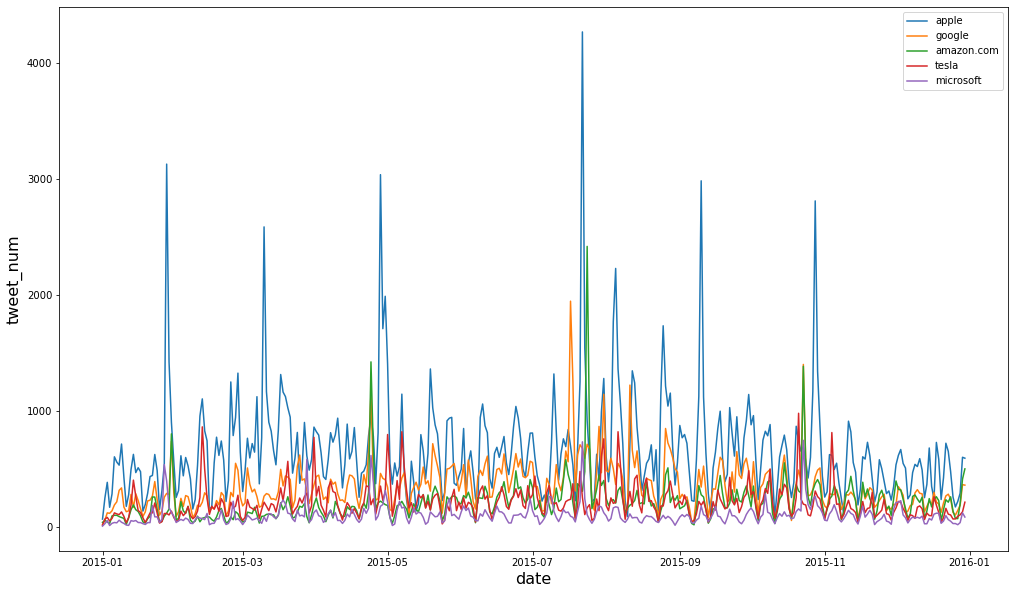

In [54]:
import matplotlib.pyplot as plt
# 企業ごとのx=ツイート日付　y=ツイート数
plt.figure(figsize=(17,10))
plt.plot(df_a['tweet_date'],df_a['tweet_num'],label='apple')
plt.plot(df_g['tweet_date'],df_g['tweet_num'],label='google')
plt.plot(df_am['tweet_date'],df_am['tweet_num'],label='amazon.com')
plt.plot(df_t['tweet_date'],df_t['tweet_num'],label='tesla')
plt.plot(df_m['tweet_date'],df_m['tweet_num'],label='microsoft')

plt.xlabel('date', fontsize = 16)
plt.ylabel('tweet_num', fontsize = 16)
plt.legend()
plt.show()

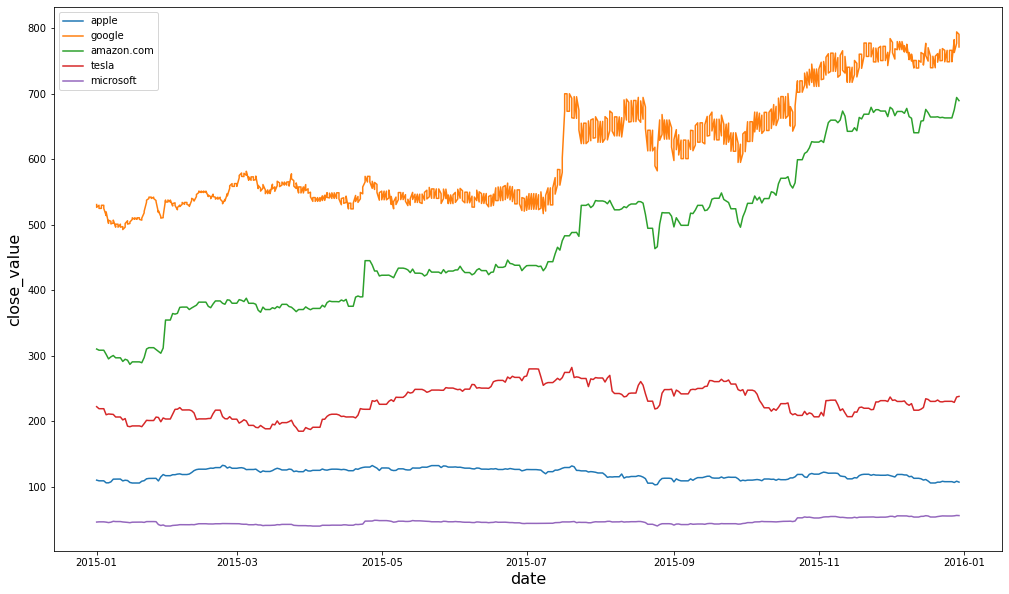

In [57]:
# 企業ごとのx=ツイート日付　y=株価
plt.figure(figsize=(17,10))
plt.plot(df_a['tweet_date'],df_a['company_value'],label='apple')
plt.plot(df_g['tweet_date'],df_g['company_value'],label='google')
plt.plot(df_am['tweet_date'],df_am['company_value'],label='amazon.com')
plt.plot(df_t['tweet_date'],df_t['company_value'],label='tesla')
plt.plot(df_m['tweet_date'],df_m['company_value'],label='microsoft')

plt.xlabel('date', fontsize = 16)
plt.ylabel('close_value', fontsize = 16)
plt.legend()
plt.show()